In [5]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
devices = tf.config.list_physical_devices()
print("\nDevices: ", devices)

gpus = tf.config.list_physical_devices('GPU')
if gpus:
  details = tf.config.experimental.get_device_details(gpus[0])
  print("GPU details: ", details)


Devices:  [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
GPU details:  {'device_name': 'METAL'}


In [91]:
RANDOM_SEED = 0
keras.utils.set_random_seed(RANDOM_SEED)
TRAINING_SIZE = 50_000
VALIDATION_SIZE = 10_000
NUM_EPOCHS = 30
BATCH_SIZE = 64

In [92]:
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [93]:
X_train_full.shape, y_train_full.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [94]:
assert X_train_full.shape[0] >= TRAINING_SIZE + VALIDATION_SIZE
X_train_full = X_train_full.astype(np.float32) / 255.0
X_test = X_test.astype(np.float32) / 255.0

In [95]:
X_valid, X_train = X_train_full[:VALIDATION_SIZE], X_train_full[VALIDATION_SIZE:TRAINING_SIZE + VALIDATION_SIZE]
y_valid, y_train = y_train_full[:VALIDATION_SIZE], y_train_full[VALIDATION_SIZE:TRAINING_SIZE + VALIDATION_SIZE]

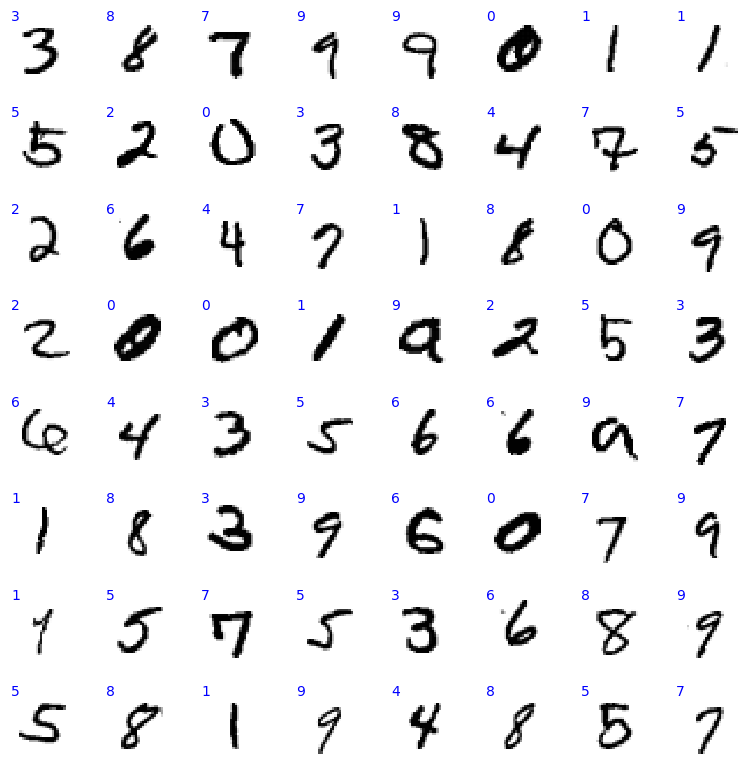

In [96]:
n_rows = 8
n_cols = 8
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis("off")
        plt.text(.1, .9, y_train[index], color="blue")
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [ ]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(
    filters=32, kernel_size=(5, 5),
    strides=(1, 1), padding="same",
    data_format="channels_last",
    name="conv_1", activation="relu"))

model.add(keras.layers.MaxPool2D(pool_size=(2, 2), name="pool_1"))
    
model.add(keras.layers.Conv2D(
    filters=64, kernel_size=(5, 5),
    strides=(1, 1), padding="same",
    name="conv_2", activation="relu"))

model.add(keras.layers.MaxPool2D(pool_size=(2, 2), name="pool_2"))

In [98]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(
    units=128, name="fc_1", 
    activation="relu"))

model.add(keras.layers.Dropout(
    rate=0.5))
    
model.add(keras.layers.Dense(
    units=10, name="fc_2",
    activation="softmax"))

In [99]:
model.build(input_shape=(None, 28, 28, 1))
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv_1 (Conv2D)                 │ (None, 28, 28, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool_1 (MaxPooling2D)           │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_2 (Conv2D)                 │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool_2 (MaxPooling2D)           │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc_1 (Dense)                    │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc_2 (Dense)                    │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 422,154 (1.61 MB)

 Trainable params: 422,154 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

fit w/GPU and 32 batch size: 9m 41.0s   
fit w/CPU and 32 batch size: 10m 21.3s  
fit w/GPU and 64 batch size: 5m 44.1s   
fit w/CPU and 64 batch size: 7m 40.6s  
fit w/GPU and 128 batch size: 3m 17.6s   
fit w/CPU and 128 batch size: 6m 43.8s 

In [100]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
with tf.device("GPU: 0"):
    history = model.fit(X_train, y_train, epochs=NUM_EPOCHS, validation_data=(X_valid, y_valid), batch_size=BATCH_SIZE)

Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.7682 - loss: 0.8455 - val_accuracy: 0.9737 - val_loss: 0.1140
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.9537 - loss: 0.2087 - val_accuracy: 0.9792 - val_loss: 0.0946
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.9667 - loss: 0.1418 - val_accuracy: 0.9799 - val_loss: 0.1043
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.9696 - loss: 0.1369 - val_accuracy: 0.9847 - val_loss: 0.0840
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.9742 - loss: 0.1178 - val_accuracy: 0.9836 - val_loss: 0.1002
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.9745 - loss: 0.1279 - val_accuracy: 0.9829 - val_loss: 0.1201
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.9764 - loss: 0.1335 - val_accuracy: 0.9854 - val_loss: 0.1083
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.9765 - loss: 0.1464 - 

In [101]:
weights = model.get_weights()
for l in weights:
    print(l.shape)

(5, 5, 1, 32)
(32,)
(3, 3, 32, 64)
(64,)
(3136, 128)
(128,)
(128, 10)
(10,)


In [102]:
for layer in model.layers:
    if "con" not in layer.name:
        continue
    

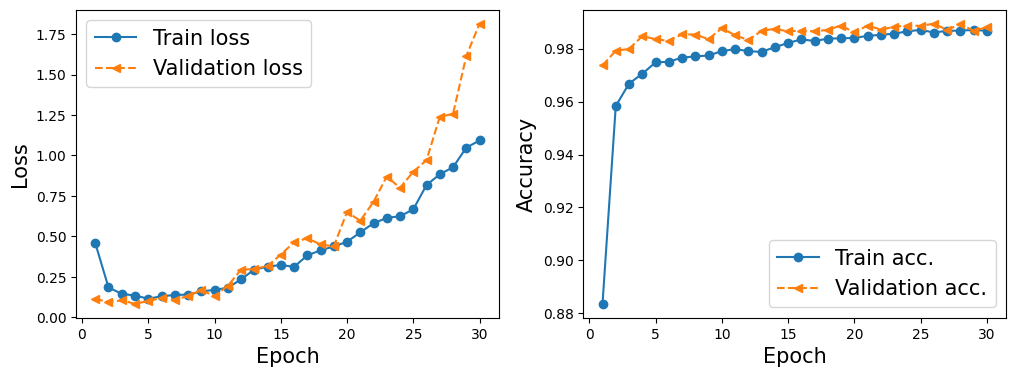

In [103]:
hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)
ax.legend(fontsize=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)

plt.show()

In [104]:
test_results = model.evaluate(X_test, y_test)
print(f"Test loss: {test_results[0]:.4f}, test acc: {test_results[1]:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9890 - loss: 1.1718
Test loss: 0.9412, test acc: 0.9918


print out misclassified characters in test

In [6]:
np.sqrt(4)

np.float64(2.0)